In [68]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [121]:
# algs = ['local-greedy-solver', 'local-steepest-solver', 'random-solver']
algs = ['local-greedy-solver', 'local-steepest-solver']
problems = ['chr18a', 'chr20a', 'esc32g', 'lipa50a', 'tai12a', 'tai12b', 'tai15a', 'tai35b']

def similarity_percentage(solution, optimal):
    count = 0
    for s_el, o_el in zip(solution, optimal):
        if s_el == o_el: count += 1
    if count == 0:
        return 0
    else:
        return len(solution) // count
    
def quality(solution, optimal):
    return 1 - ((solution - optimal) / solution)


[ 50. 100. 150. 200. 250. 300.] [0.7497635454668288, 0.6130256043547287, 0.609499527049499, 0.6163224032016185, 0.6110463831679169, 0.6132631760663785]
[ 50. 100. 150. 200. 250. 300.] [0.5768790934608587, 0.620550948957602, 0.6083238506997769, 0.6071426532876225, 0.6090798768875381, 0.6042338636037445]


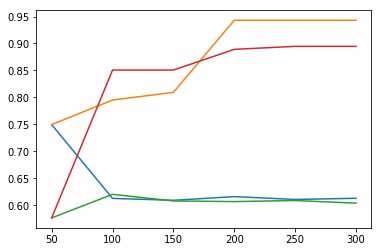

In [123]:
algs = ['local-greedy-solver', 'local-steepest-solver']
problems = ['chr18a', 'chr20a', 'esc32g', 'lipa50a', 'tai12a', 'tai12b', 'tai15a', 'tai35b']
size = 300

for problem in problems[0:1]:
    with open('../QapData/' + problem + '.sln') as fo:
        optimal = fo.read()
        optimal_result = int(optimal.split('\n')[0].strip().split(' ')[1])
        optimal_permutation = optimal.split('\n')[1].strip().split(' ')
        
    alg_solution = {}
    for alg in algs:
#         alg_solution[alg] = []
        alg_solution[alg] = {}
        with open('../QapSolver/results/' + problem + '_' + alg + '_' + str(size) + '.csv') as f:
            solution = f.read()
            alg_solution[alg]['total'] = []
            alg_solution[alg]['avg'] = []
            alg_solution[alg]['best'] = []
            
            for i, line in enumerate(solution.split('\n')):
                if i==0 or i == (size+1): continue
                parsed = line.split(',')
                permutation = parsed[4]
                score = parsed[1]
# zad 3   
#                 alg_solution[alg].append(quality(int(score), int(optimal_result)))

# zad 4
                alg_solution[alg]['total'].append(quality(int(score), int(optimal_result)))
                if (i != 0) and ((i-1) % 50 == 0):
                    alg_solution[alg]['avg'].append(np.average(alg_solution[alg]['total']))
                    alg_solution[alg]['best'].append(np.max(alg_solution[alg]['total']))

    # zad 3
#     X = np.linspace(1, size, size)
#     for alg in algs:
#         plt.scatter(X, alg_solution[alg])
#     plt.show

    # zad 4
    X = np.linspace(50, 300, 6)
    for alg in algs:
        print(X, alg_solution[alg]['avg'])
        plt.plot(X, alg_solution[alg]['avg'])
        plt.plot(X, alg_solution[alg]['best'])
        

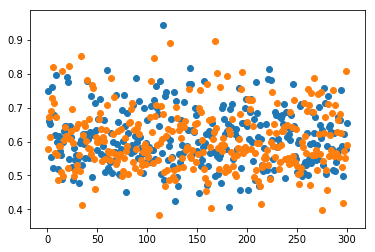

<function matplotlib.pyplot.show(*args, **kw)>

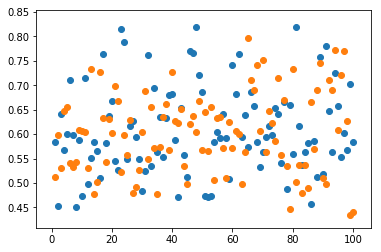

In [94]:
# len(alg_solution['local-greedy-solver'])
X = np.linspace(1, 100, 100)
plt.scatter(X, alg_solution['local-greedy-solver'])
plt.scatter(X, alg_solution['local-steepest-solver'])
plt.show